# Práctica 10: K-Means

Universidad Iberoamericana Ciudad de México

Otoño 2023

Creado por: Luis Norberto Zúñiga Morales, inspirado en el libro *Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow*.

En esta práctica estudiaremos la implementación de K-Means en scikit-learn, así como las particularidades para trabajar con este modelo. En particular, contempla la forma de elegir el mejor valor de clústeres y las limitaciones de K-Means.



---



## Librerías

Vamos a empezar importando nuestras librerías que usaremos a lo largo de esta práctica:

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Pregunta**: ¿Qué hace la función `make_blobs` que importamos anteriormente? Escribir su descripción en un celda de texto abajo.

## Conjunto de datos

En esta ocasión no vamos a usar un conjunto de datos de un repositorio en línea. En su lugar, crearemos nuestros datos con la función `make_blobs`. Cómo parámetros establecemos el número de muestras o datos en 500, cuatro centroides en total, desviación estándar (medida de dispersión) de 0.70 y una semilla aleatoria con un valor de 1.

In [ ]:
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.70,
                  random_state=1)

¿Qué forma tienen los datos?

In [ ]:
print(X[:5])

[[-6.96573381 -9.91464081]
 [-8.16089889 -7.44355238]
 [-9.74065023 -3.09031911]
 [-2.11240159  5.03753069]
 [-7.18147629 -3.03676107]]


In [ ]:
print(y[:5])

[2 2 1 0 3]


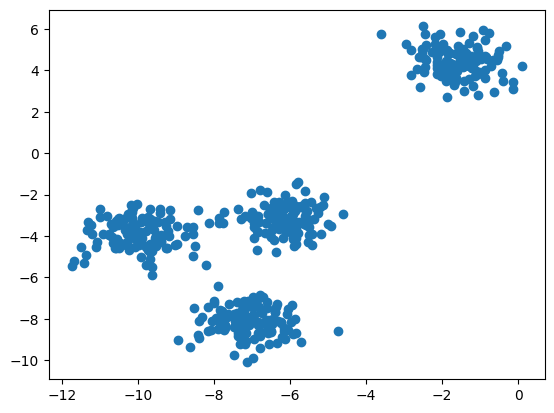

In [ ]:
plt.scatter(X[:,0], X[:,1])

Antes de comenzar, vale la pena mencionar que es muy importante escalar los datos de entrada antes de ejecutar el algoritmo de K-Means. Esto con la finalidad de evitar que los datos se encuentren muy "estirados", lo cual presenta una dificultad para el algoritmo.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

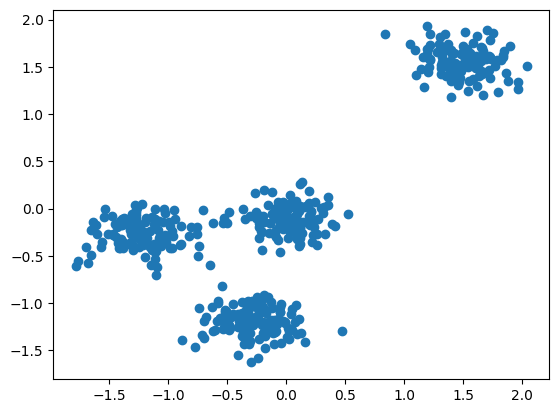

In [ ]:
plt.scatter(X[:,0], X[:,1])

## K-Means en scikit-learn

En primera instancia, vamos a usar la implementación de scikit-learn de K-Means, la cual se encuentra en `sklearn.cluster`. Noten que, como lo indica el algoritmo visto en clase, nosotros debemos especificar el valor de k, o el número de centroides.

**Pregunta**: Visiten [la documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de la implementación de K-Means. ¿Qué indican los parámetros de la función? Hacer un breve listado mencionando qué controla cada uno de ellos en la celda de texto de abajo.

Empecemos con algo sencillo: vamos a indicar el número de clústeres en 5 y realizamos las predicciones para cada punto del conjunto de datos.

In [ ]:
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Ya que se entrenó el modelo, accedamos a los centroides que determinó el modelo de K-Means:

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.44810809, -1.16113699],
       [ 1.49433905,  1.55538621],
       [-1.2199479 , -0.26567123],
       [ 0.01543375, -0.10215559],
       [-0.08568085, -1.21526255]])

Después, vamos a graficar su ubicación con el conjunto de datos anterior:

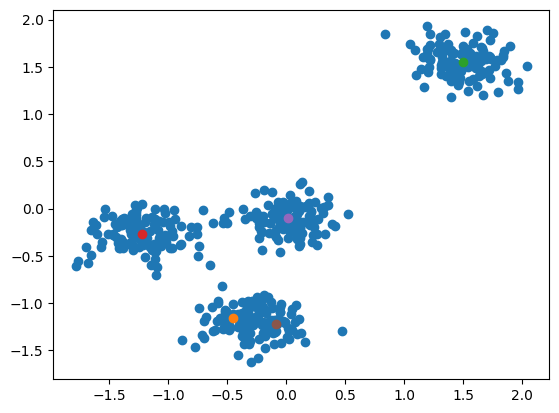

In [ ]:
plt.scatter(X[:,0], X[:,1])
for i in range(len(centroids)):
  plt.scatter(centroids[i,0], centroids[i,1])

## Inicialización de los centroides

Como explicamos en clase, el algoritmo de K-Means es sensible a la inicialización de las posiciones iniciales de los centroides de las clases. Por lo tanto, es recomendable considerar una buena forma para inicialar estos parámetros. Scikit-learn cuenta con dos:

**Pregunta**: ¿Cuáles son esas dos formas de inicializar las posiciones de los centroides? Escribir su respuesta en la celda de texto de abajo.

Por default, la forma que el método de K-Means disponible en scikit-learn es la versión de K-Means++. Vamos a implementarlo abajo:

In [ ]:
k = 5
kmeans = KMeans(n_clusters = k, init='k-means++')
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.37870651, -0.24611404],
       [ 1.49433905,  1.55538621],
       [-0.27702177, -1.19104124],
       [ 0.02877388, -0.10137729],
       [-0.98364676, -0.28802394]])

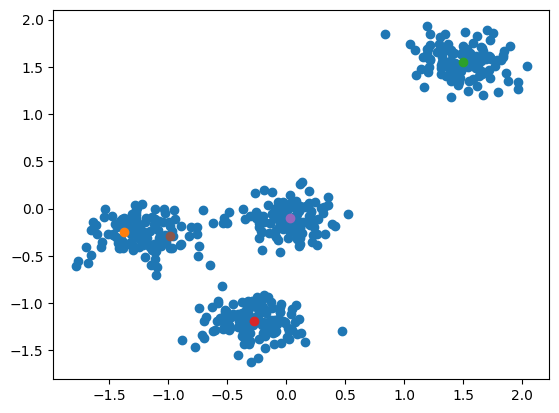

In [ ]:
plt.scatter(X[:,0], X[:,1])
for i in range(len(centroids)):
  plt.scatter(centroids[i,0], centroids[i,1])

**Pregunta**: ¿Por qué salen resultados distintos?

El parámetro `n_init`, que tiene un valor base de 10, nos indica que todo el proceso de K-Means se ejecuta ese número de veces, cada una con una inicialización distinta (al azar) y al final, se reporta aquella que tenga la mayor inercia, que se define (según la documentación) como sigue:



> *Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.*

Si son curiosos, pueden acceder a este valor via la variable `inertia_`:



In [ ]:
kmeans.inertia_

30.461837880937196

## Método del codo (*Elbow method*)

Ya es momento de resolver el problema del mejor de valor de $k$ para nuestro modelo de K-Means. Como se mencionó en clase, para esto sirve el método del codo. La idea es sencilla:

1. Realizar K-Means para $k\in [1,2,...,K]$.
2. Para cada modelo entrenado, obtener su inercia y guardarlo en una estructura de datos.
3. Graficar los resultados.
4. Elegir el valor en donde inicia el "brazo" (que sería el codo).

In [ ]:
# within-cluster sums of squares
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

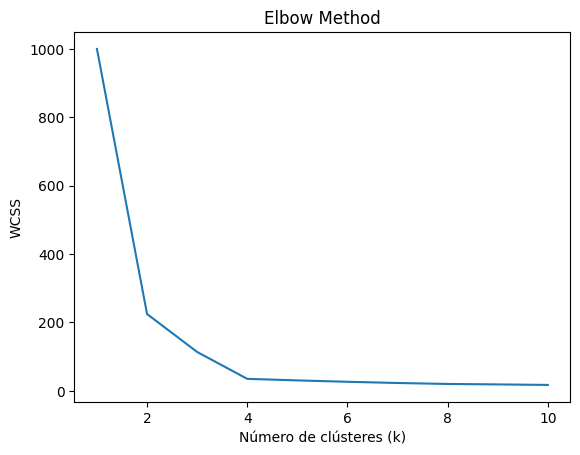

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()

Como pueden apreciar, el valor de la inercia disminuye rápidamente conforme $k$ aumenta, en particular a partir de $k=4$, punto donde se encuentra el "codo" del brazo. Si no supieramos que 4 es el mejor valor para $k$:

- No se elige un valor menor por que el valor de inercia es muy alto.
- No se elige un valor mayor por que la mejor no es considerable. Además, al aumentar el número de clústeres, estariamos partiendo a la mitad clústeres bien definidos sin razón alguna.

## Puntuación de Silueta (silhouette score)

Aunque ampliamente usado, el método del codo es algo burdo para determinar el número de clústeres óptimo para nuestros datos. Una mejor manera consiste en usar la puntuación de silueta (*silhouette score*), la cual es la media del coeficiente de silueta (*silhouette coefficient*) sobre todas las instancias.

**Pregunta**: ¿Qué es el coeficiente de silueta? Revisen [este enlace](https://en.wikipedia.org/wiki/Silhouette_(clustering)).

El coeficiente de silueta de una instancia es igual a

$$\frac{b-a}{\max{(a,b)}}$$

donde $a$ es la distancia promedio a las otras instancias en el mismo clúster (también conocido como la distancia media intra-clúster) y $b$ es la distanca media a las instancias del clúster próximo más cercano, definido como aquel que maximiza $b$, excluyendo el clúster propio de la instancia.

El coeficiente de silueta varía entre -1 y +1:

- Un coeficiente cercano a +1 indica que la instancia se encuentra bien adentro de su propio clúster y lejos de otros clústeres.
- Un coeficiente cercano a 0 indica que la instancia se encuentra en los límites del clúster al que pertenece.
- Un coeficiente cercano a -1 indica que la instancia pudo ser asignada al clúster equivocado.

Scikit-learn cuenta (oportunamente) con un método para determinar esta métrica:

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.34093221955471154

Ahora, vamos a repetir el análisis con distintos valores de $k$, similar al método del codo:

In [ ]:
# within-cluster sums of squares
sil_score = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  sil_score.append(silhouette_score(X, kmeans.labels_))

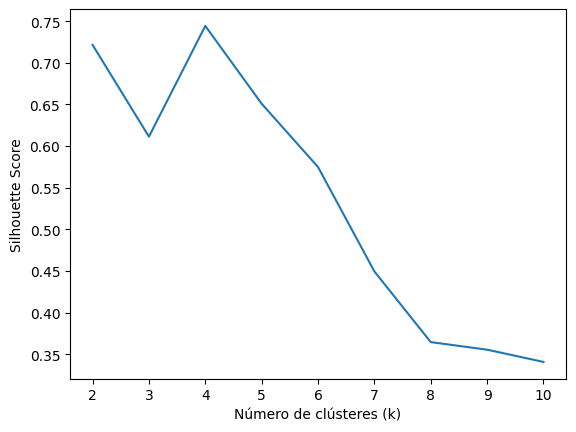

In [ ]:
plt.plot(range(2, 11), sil_score)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.show()

El análisis anterior arroja mejor información:

- Para empezar, tanto 2 como 4 tienen un buen valor de puntuación de silueta.
- A partir de 5, dicha métrica decrece considerablemente, lo cual contrasta al no ser visible cuando comparamos los valores de inercia para distintos valores de $k$.

## Diagrama de siluetas

Otra forma más informativa para determinar el número de clústeres es graficar el coeficiente de silueta para cada instancia, ordenados por el clúster al que son asignados y por el valor del coeficiente, de mayor a menor. A esto se le conoce como diagrama de siluetas. Vamos a realizarlo de una manera "sencilla":


For n_clusters = 2 The average silhouette_score is : 0.7215281617591547
For n_clusters = 3 The average silhouette_score is : 0.5443565023668334
For n_clusters = 4 The average silhouette_score is : 0.7442692268500094
For n_clusters = 5 The average silhouette_score is : 0.6182040013271395
For n_clusters = 6 The average silhouette_score is : 0.5331457424627659
For n_clusters = 7 The average silhouette_score is : 0.4363846578027589
For n_clusters = 8 The average silhouette_score is : 0.44458240170722696
For n_clusters = 9 The average silhouette_score is : 0.35751493647952537
For n_clusters = 10 The average silhouette_score is : 0.34114260248287204


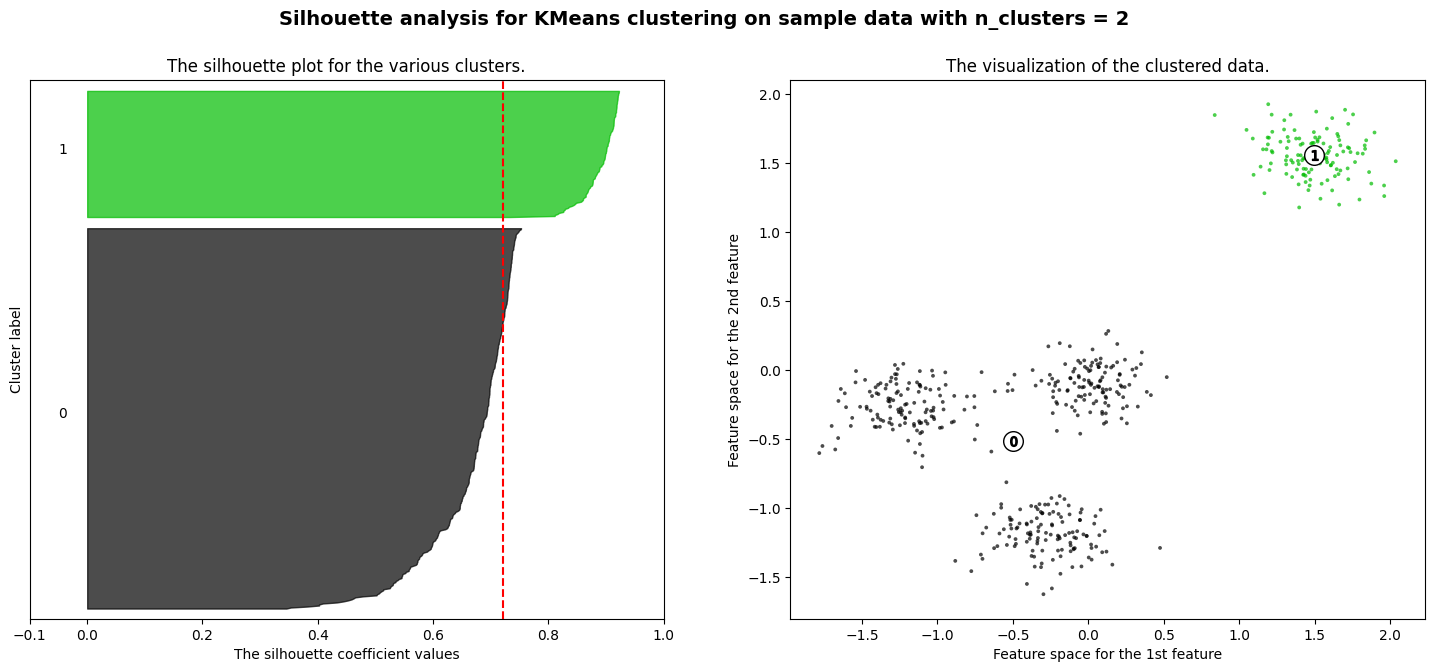

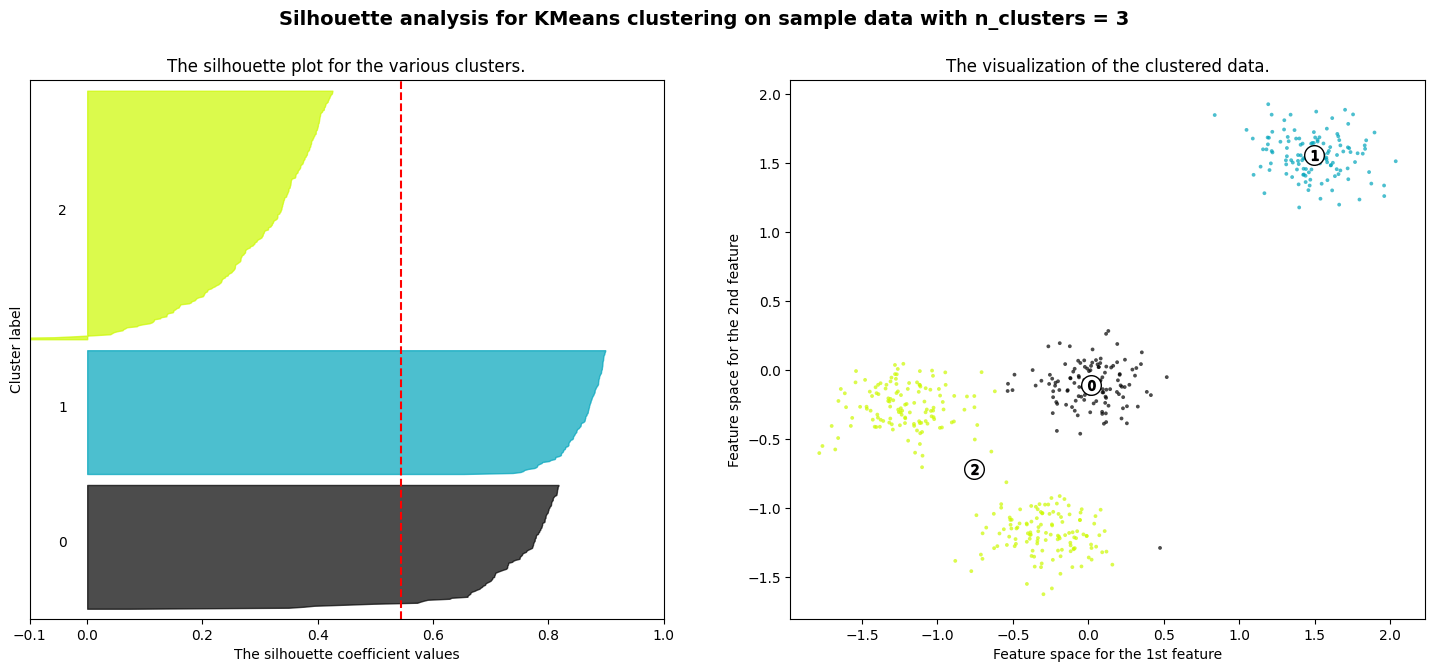

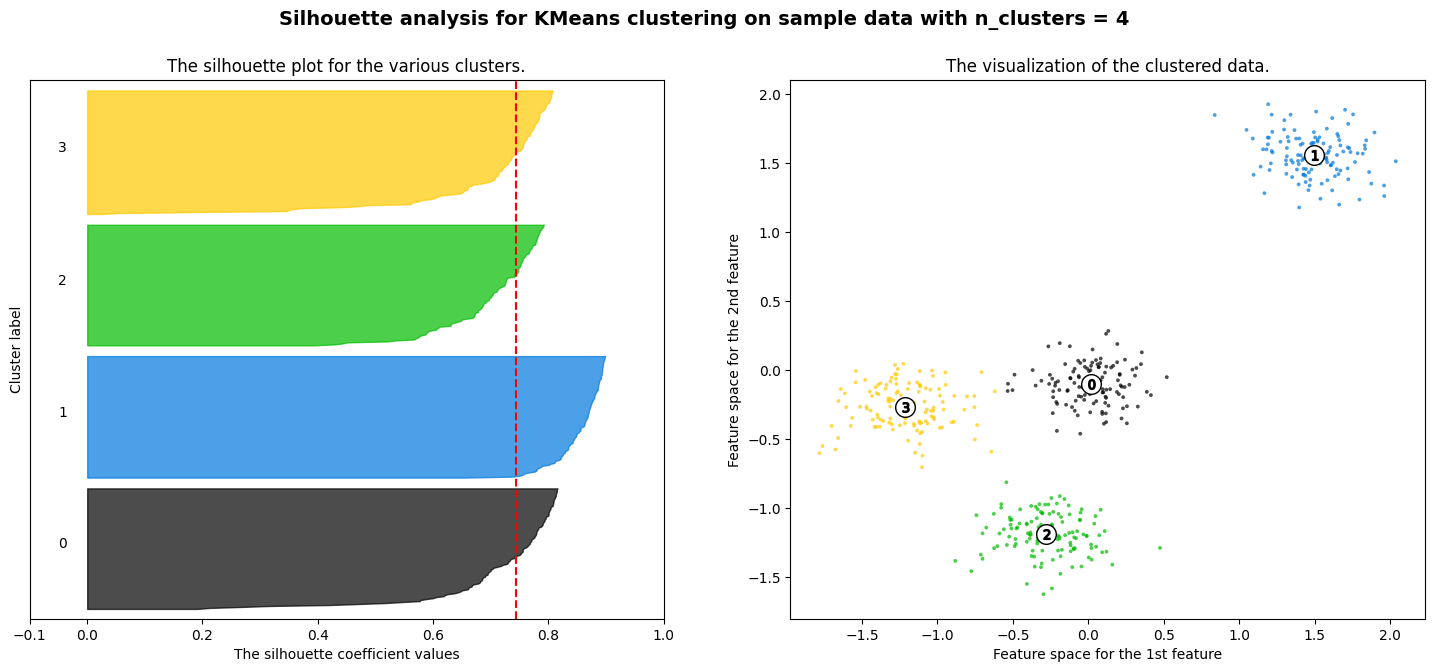

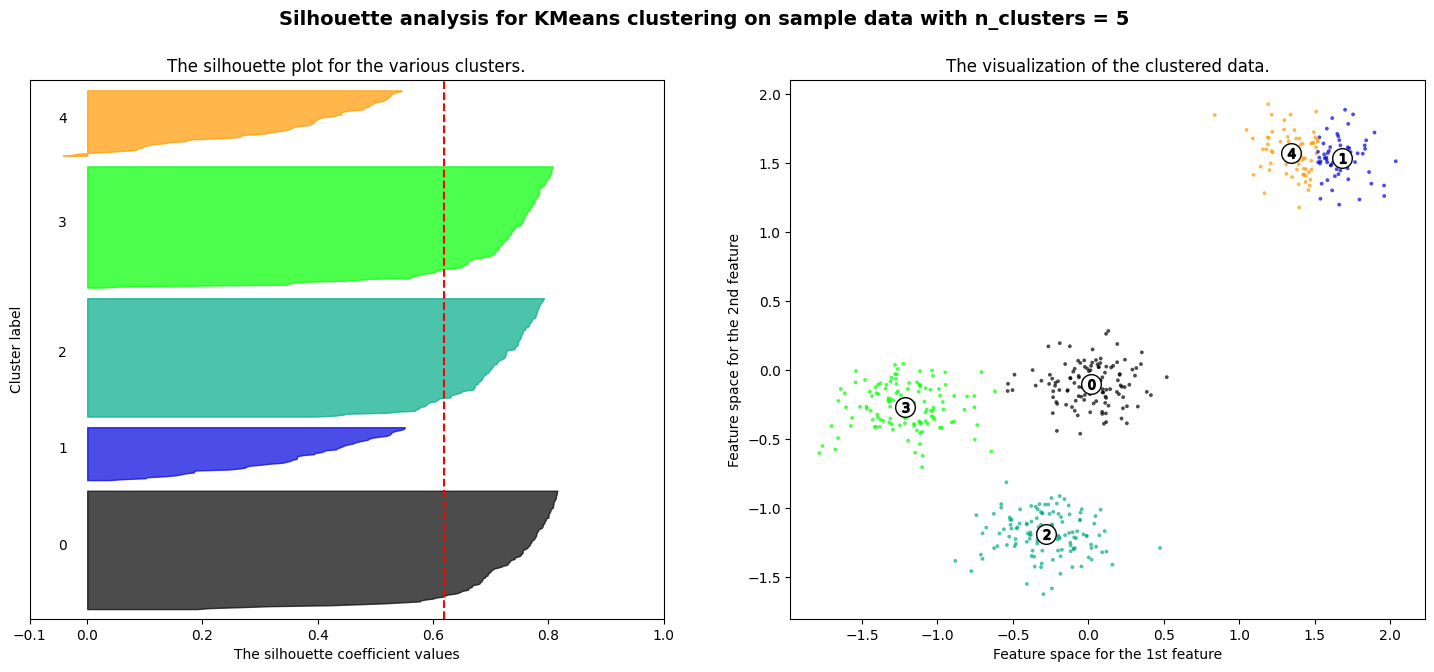

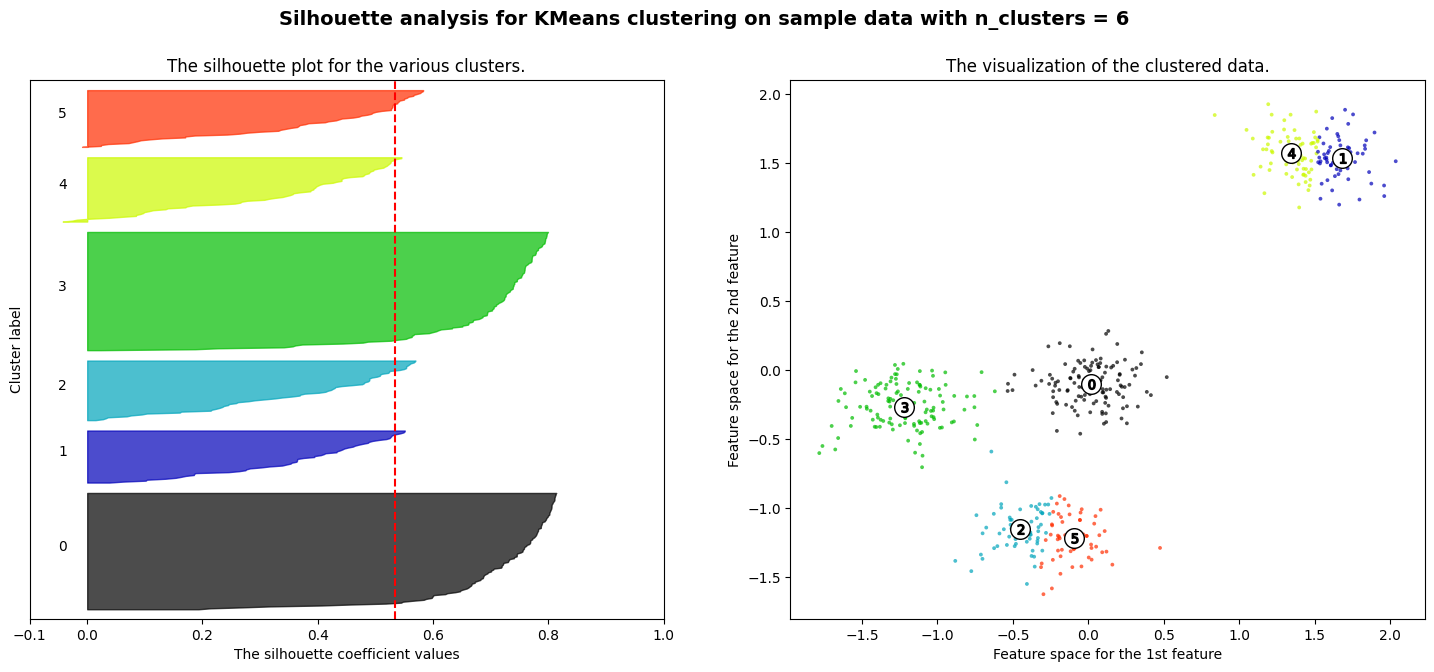

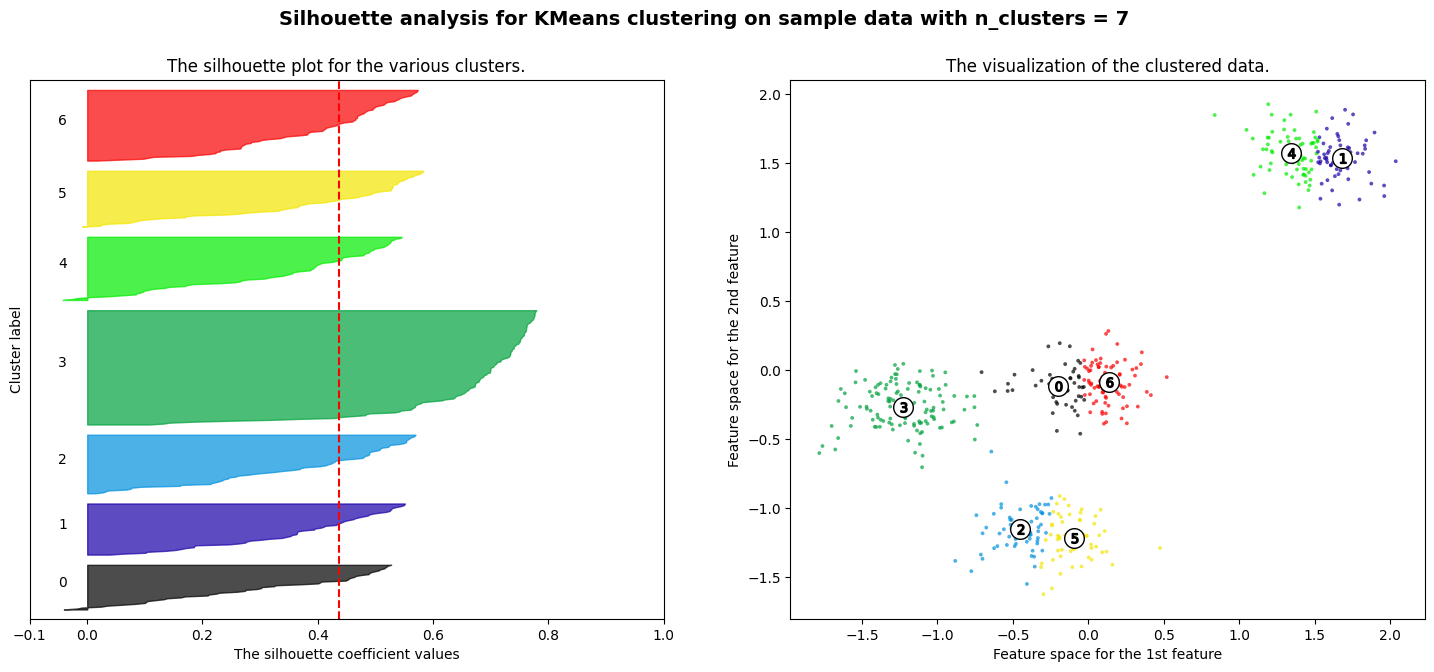

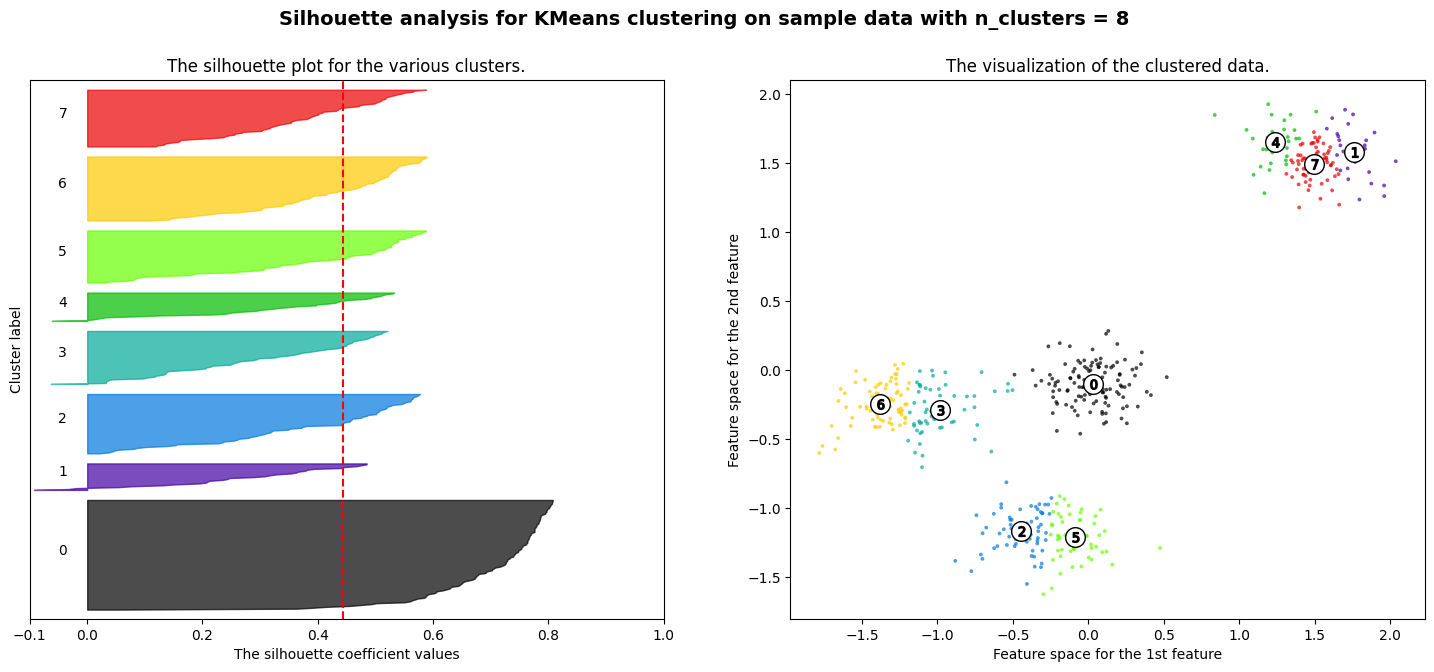

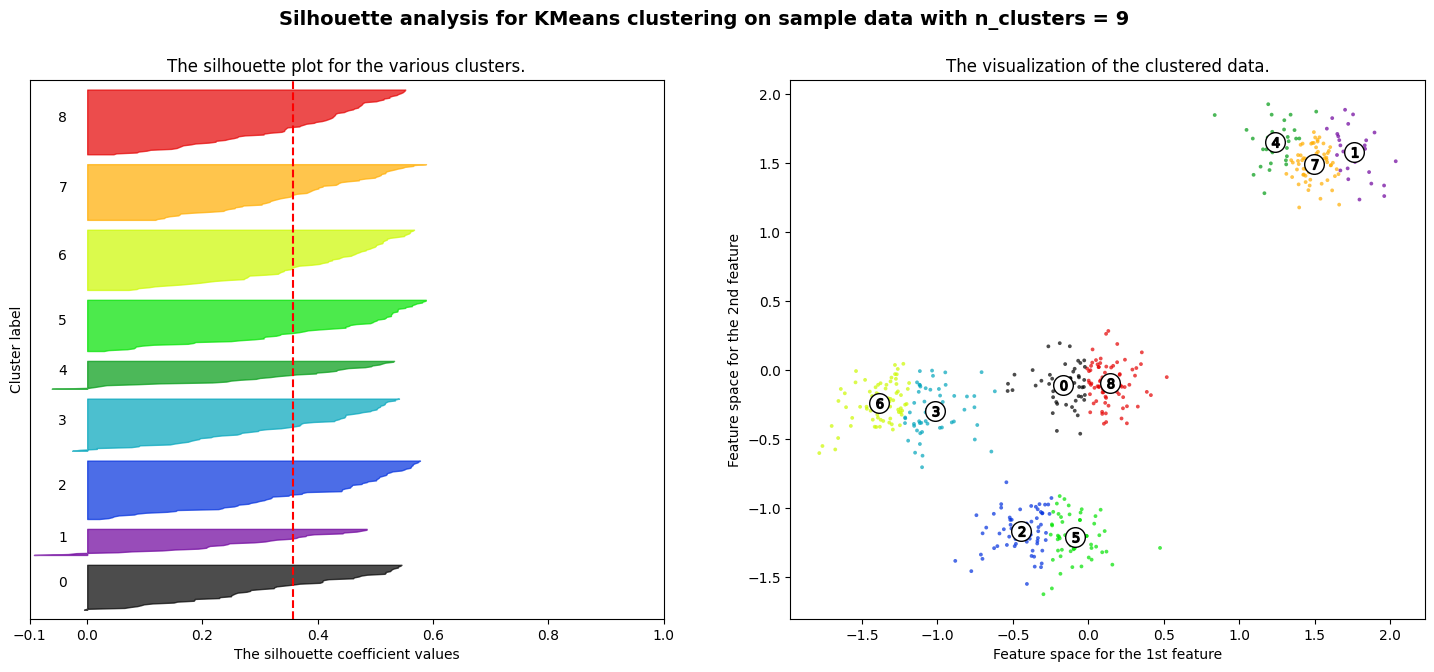

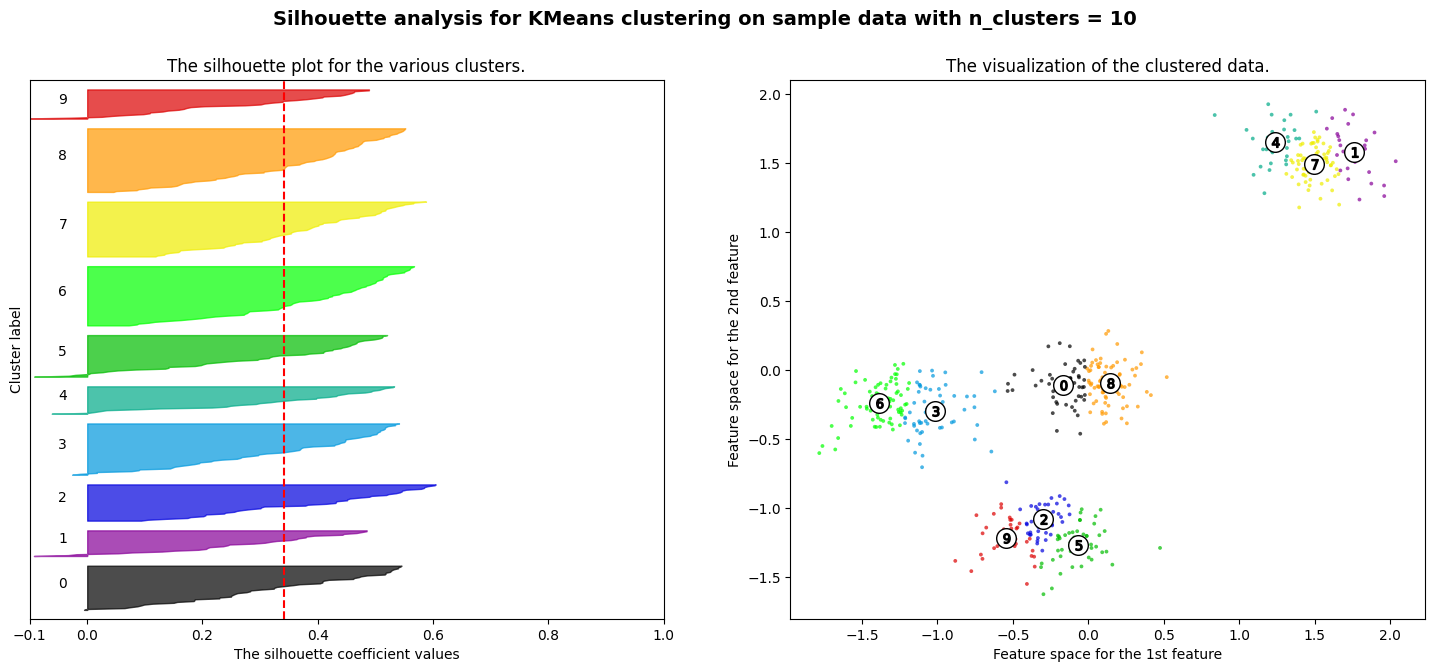

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

- Cada diagrama contiene un cuchillo por clúster.
- La altura del cuchillo indica el número de instancias que el clúster contiene, y su ancho representa los coeficientes de silueta de las instancias ordenadas.
- La línea punteada indica el coeficiente de silueta medio (puntuación de silueta).
 - Cuando la mayoría de las instancias en un clúster tienen un coeficiente menor que este valor (terminan a la izquierda), el clúster se dice que es malo ya que sus instancias están muy cerca de otro clúster.
 - Con $k=3, 5, 6, 7, 8$ tenemos malos clústeres.
 - Parece que con $k = 2$ y $k=4$ tenemos los mejores resultados.
 - Sin embargo, con $k=9$ y $k=10$ también hay siluetas llamativas, pero al aumentar el número de clústeres, la calidad de asignación baja, lo cual se refleja en la puntuación negativa en algunas instancias. Por ende, son malos valores.

## Límites de K-Means

A pesar de los méritos de K-Means como algoritmo de aprendizaje no supervisado (en particular, su velocidad y escalabilidad), el algoritmo presenta ciertas limitaciones:

1. Es necesario ejecutar el algoritmo varias veces para evitar soluciones subóptimas.
2. Debemos especificar el número de clústeres.
3. K-Means no se comporta muy bien con clústeres de varios tamaños, diferentes densidades o formas que no sean esféricas.

Vamos a probar este último punto con un conjunto de datos que no tiene esa forma de esfera (o muégano), que crearemos con la función `make_moons`:

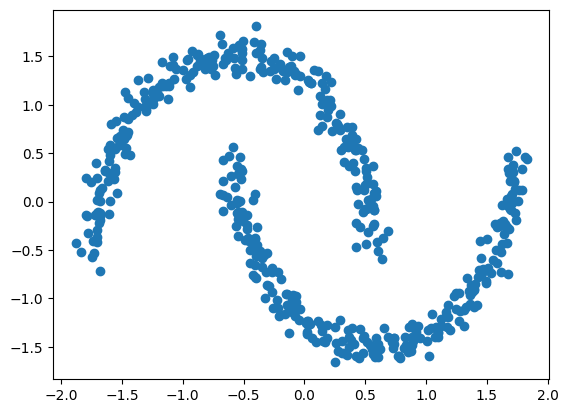

In [ ]:
from sklearn.datasets import make_moons

# creamos los datos
X, y = make_moons(n_samples=500, noise = 0.05, random_state=1)

# los escalamos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# los graficamos
plt.scatter(X[:,0], X[:,1])

Realizamos todo el circo anterior:

- Determinar la puntuación de silueta
- Comparar con el método del codo
- Obtener el gráfico de cuchillos

In [ ]:
# within-cluster sums of squares
sil_score = []
for i in range(2, 22):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  sil_score.append(silhouette_score(X, kmeans.labels_))

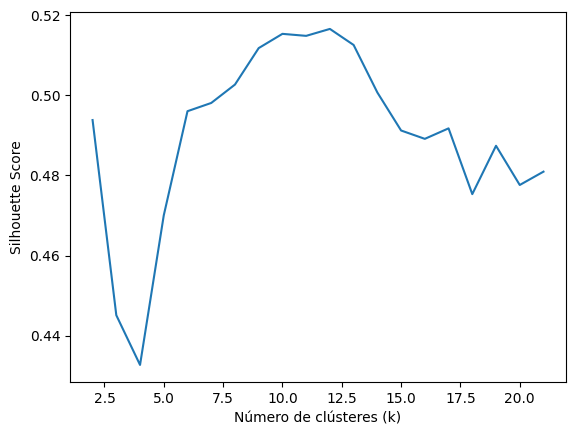

In [ ]:
plt.plot(range(2, 22), sil_score)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# within-cluster sums of squares
wcss = []
for i in range(1, 21):
  kmeans = KMeans(n_clusters=i, init='k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

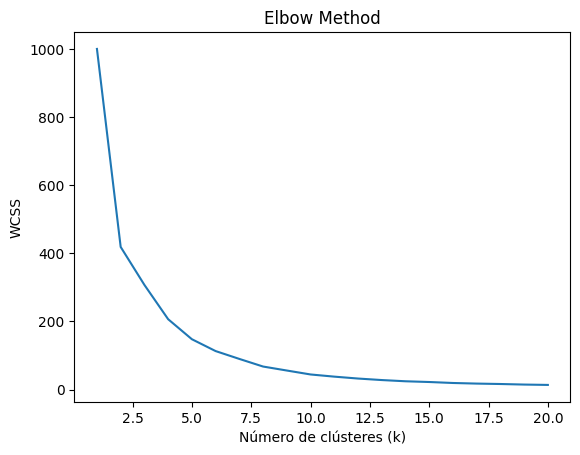

In [ ]:
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
for n_clusters in range(2,22):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Pregunta**: ¿Qué pueden concluir del diagrama de siluetas y los valores de la puntuación de siluetas, considerando lo que esperaban desde un inicio? Escriban su respuesta abajo.